Data Analysis Phas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\healthcare_dataset.csv")

In [3]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
df.Age.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
55495    False
55496    False
55497    False
55498    False
55499    False
Name: Age, Length: 55500, dtype: bool

In [6]:
df["Blood Type"].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [7]:
df["Medical Condition"].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [8]:
df.Hospital.unique()

array(['Sons and Miller', 'Kim Inc', 'Cook PLC', ...,
       'Guzman Jones and Graves,', 'and Williams, Brown Mckenzie',
       'Moreno Murphy, Griffith and'], dtype=object)

In [9]:
df.isna()

Name    Age  Gender  Blood Type  Medical Condition  Date of Admission  \
0      False  False   False       False              False              False   
1      False  False   False       False              False              False   
2      False  False   False       False              False              False   
3      False  False   False       False              False              False   
4      False  False   False       False              False              False   
...      ...    ...     ...         ...                ...                ...   
55495  False  False   False       False              False              False   
55496  False  False   False       False              False              False   
55497  False  False   False       False              False              False   
55498  False  False   False       False              False              False   
55499  False  False   False       False              False              False   

       Doctor  Hospital  Insurance Provider  Billing Amount  Room Number  \
0       False     False               False           False        False   
1       False     False               False           False        False   
2       False     False               False           False        False   
3       False     False               False           False        False   
4       False     False               False           False        False   
...       ...       ...                 ...             ...          ...   
55495   False     False               False           False        False   
55496   False     False               False           False        False   
55497   False     False               False           False        False   
55498   False     False               False           False        False   
55499   False     False               False           False        False   

       Admission Type  Discharge Date  Medication  Test Results  
0               False           False       False         False  
1               False           False       False         False  
2               False           False       False         False  
3               False           False       False         False  
4               False           False       False         False  
...               ...             ...         ...           ...  
55495           False           False       False         False  
55496           False           False       False         False  
55497           False           False       False         False  
55498           False           False       False         False  
55499           False           False       False         False  

[55500 rows x 15 columns]

In [10]:
# تحويل عمود 'Date of Admission' و 'Discharge Date' إلى صيغة تاريخية
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# حساب عدد الأيام التي قضاها المريض في المستشفى
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# بعد ذلك يمكنك تقسيم التواريخ إلى مكونات اليوم، الشهر، والسنة إذا كنت بحاجة لذلك
df['Admission Day'] = df['Date of Admission'].dt.day
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

df['Discharge Day'] = df['Discharge Date'].dt.day
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

# يمكنك بعد ذلك حذف التواريخ الأصلية إذا لم تكن بحاجة إليها
df = df.drop(columns=['Date of Admission', 'Discharge Date'])

# عرض أول بضعة أسطر للتحقق من النتائج
df[['Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day', 'Discharge Month', 'Discharge Year', 'Length of Stay']].head()

Admission Day  Admission Month  Admission Year  Discharge Day  \
0             31                1            2024              2   
1             20                8            2019             26   
2             22                9            2022              7   
3             18               11            2020             18   
4             19                9            2022              9   

   Discharge Month  Discharge Year  Length of Stay  
0                2            2024               2  
1                8            2019               6  
2               10            2022              15  
3               12            2020              30  
4               10            2022              20

In [11]:
df.head()

Name  Age  Gender Blood Type Medical Condition            Doctor  \
0  Bobby JacksOn   30    Male         B-            Cancer     Matthew Smith   
1   LesLie TErRy   62    Male         A+           Obesity   Samantha Davies   
2    DaNnY sMitH   76  Female         A-           Obesity  Tiffany Mitchell   
3   andrEw waTtS   28  Female         O+          Diabetes       Kevin Wells   
4  adrIENNE bEll   43  Female        AB+            Cancer    Kathleen Hanna   

                     Hospital Insurance Provider  Billing Amount  Room Number  \
0             Sons and Miller         Blue Cross    18856.281306          328   
1                     Kim Inc           Medicare    33643.327287          265   
2                    Cook PLC              Aetna    27955.096079          205   
3  Hernandez Rogers and Vang,           Medicare    37909.782410          450   
4                 White-White              Aetna    14238.317814          458   

  Admission Type   Medication  Test Results  Length of Stay  Admission Day  \
0         Urgent  Paracetamol        Normal               2             31   
1      Emergency    Ibuprofen  Inconclusive               6             20   
2      Emergency      Aspirin        Normal              15             22   
3       Elective    Ibuprofen      Abnormal              30             18   
4         Urgent   Penicillin      Abnormal              20             19   

   Admission Month  Admission Year  Discharge Day  Discharge Month  \
0                1            2024              2                2   
1                8            2019             26                8   
2                9            2022              7               10   
3               11            2020             18               12   
4                9            2022              9               10   

   Discharge Year  
0            2024  
1            2019  
2            2022  
3            2020  
4            2022

In [12]:
df.head()

Name  Age  Gender Blood Type Medical Condition            Doctor  \
0  Bobby JacksOn   30    Male         B-            Cancer     Matthew Smith   
1   LesLie TErRy   62    Male         A+           Obesity   Samantha Davies   
2    DaNnY sMitH   76  Female         A-           Obesity  Tiffany Mitchell   
3   andrEw waTtS   28  Female         O+          Diabetes       Kevin Wells   
4  adrIENNE bEll   43  Female        AB+            Cancer    Kathleen Hanna   

                     Hospital Insurance Provider  Billing Amount  Room Number  \
0             Sons and Miller         Blue Cross    18856.281306          328   
1                     Kim Inc           Medicare    33643.327287          265   
2                    Cook PLC              Aetna    27955.096079          205   
3  Hernandez Rogers and Vang,           Medicare    37909.782410          450   
4                 White-White              Aetna    14238.317814          458   

  Admission Type   Medication  Test Results  Length of Stay  Admission Day  \
0         Urgent  Paracetamol        Normal               2             31   
1      Emergency    Ibuprofen  Inconclusive               6             20   
2      Emergency      Aspirin        Normal              15             22   
3       Elective    Ibuprofen      Abnormal              30             18   
4         Urgent   Penicillin      Abnormal              20             19   

   Admission Month  Admission Year  Discharge Day  Discharge Month  \
0                1            2024              2                2   
1                8            2019             26                8   
2                9            2022              7               10   
3               11            2020             18               12   
4                9            2022              9               10   

   Discharge Year  
0            2024  
1            2019  
2            2022  
3            2020  
4            2022

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Room Number         55500 non-null  int64  
 10  Admission Type      55500 non-null  object 
 11  Medication          55500 non-null  object 
 12  Test Results        55500 non-null  object 
 13  Length of Stay      55500 non-null  int64  
 14  Admission Day       55500 non-null  int32  
 15  Admission Month     55500 non-null  int32  
 16  Admi

In [14]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Medication            0
Test Results          0
Length of Stay        0
Admission Day         0
Admission Month       0
Admission Year        0
Discharge Day         0
Discharge Month       0
Discharge Year        0
dtype: int64

In [15]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Medication            0
Test Results          0
Length of Stay        0
Admission Day         0
Admission Month       0
Admission Year        0
Discharge Day         0
Discharge Month       0
Discharge Year        0
dtype: int64

In [16]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Length of Stay',
       'Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day',
       'Discharge Month', 'Discharge Year'],
      dtype='object')

Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])


In [18]:
from sklearn.preprocessing import LabelEncoder
df["Blood Type"] = LabelEncoder().fit_transform(df["Blood Type"])

In [19]:

df["Medical Condition"] = LabelEncoder().fit_transform(df["Medical Condition"])

In [20]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [21]:
df["Insurance Provider"] = LabelEncoder().fit_transform(df["Insurance Provider"])

In [22]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [23]:
df["Admission Type"] = LabelEncoder().fit_transform(df["Admission Type"])

In [24]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [25]:
df["Test Results"] = LabelEncoder().fit_transform(df["Test Results"])

In [26]:
df.Medication.unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [27]:
df["Medication"] = LabelEncoder().fit_transform(df["Medication"])

In [28]:
df.head()

Name  Age  Gender  Blood Type  Medical Condition  \
0  Bobby JacksOn   30       1           5                  2   
1   LesLie TErRy   62       1           0                  5   
2    DaNnY sMitH   76       0           1                  5   
3   andrEw waTtS   28       0           6                  3   
4  adrIENNE bEll   43       0           2                  2   

             Doctor                    Hospital  Insurance Provider  \
0     Matthew Smith             Sons and Miller                   1   
1   Samantha Davies                     Kim Inc                   3   
2  Tiffany Mitchell                    Cook PLC                   0   
3       Kevin Wells  Hernandez Rogers and Vang,                   3   
4    Kathleen Hanna                 White-White                   0   

   Billing Amount  Room Number  Admission Type  Medication  Test Results  \
0    18856.281306          328               2           3             2   
1    33643.327287          265               1           1             1   
2    27955.096079          205               1           0             2   
3    37909.782410          450               0           1             0   
4    14238.317814          458               2           4             0   

   Length of Stay  Admission Day  Admission Month  Admission Year  \
0               2             31                1            2024   
1               6             20                8            2019   
2              15             22                9            2022   
3              30             18               11            2020   
4              20             19                9            2022   

   Discharge Day  Discharge Month  Discharge Year  
0              2                2            2024  
1             26                8            2019  
2              7               10            2022  
3             18               12            2020  
4              9               10            2022

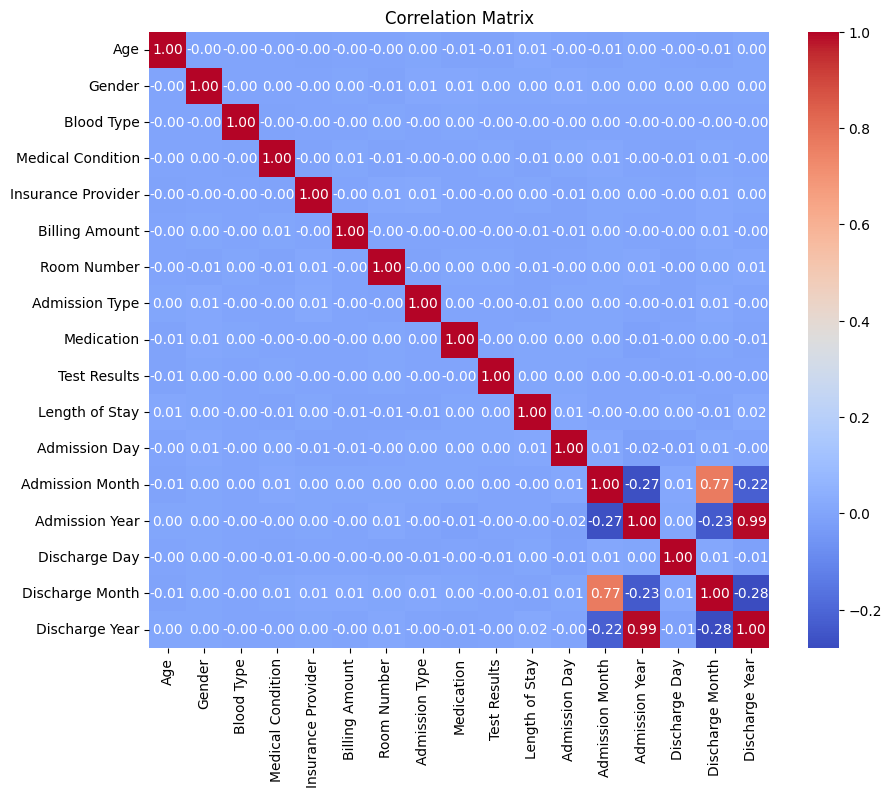

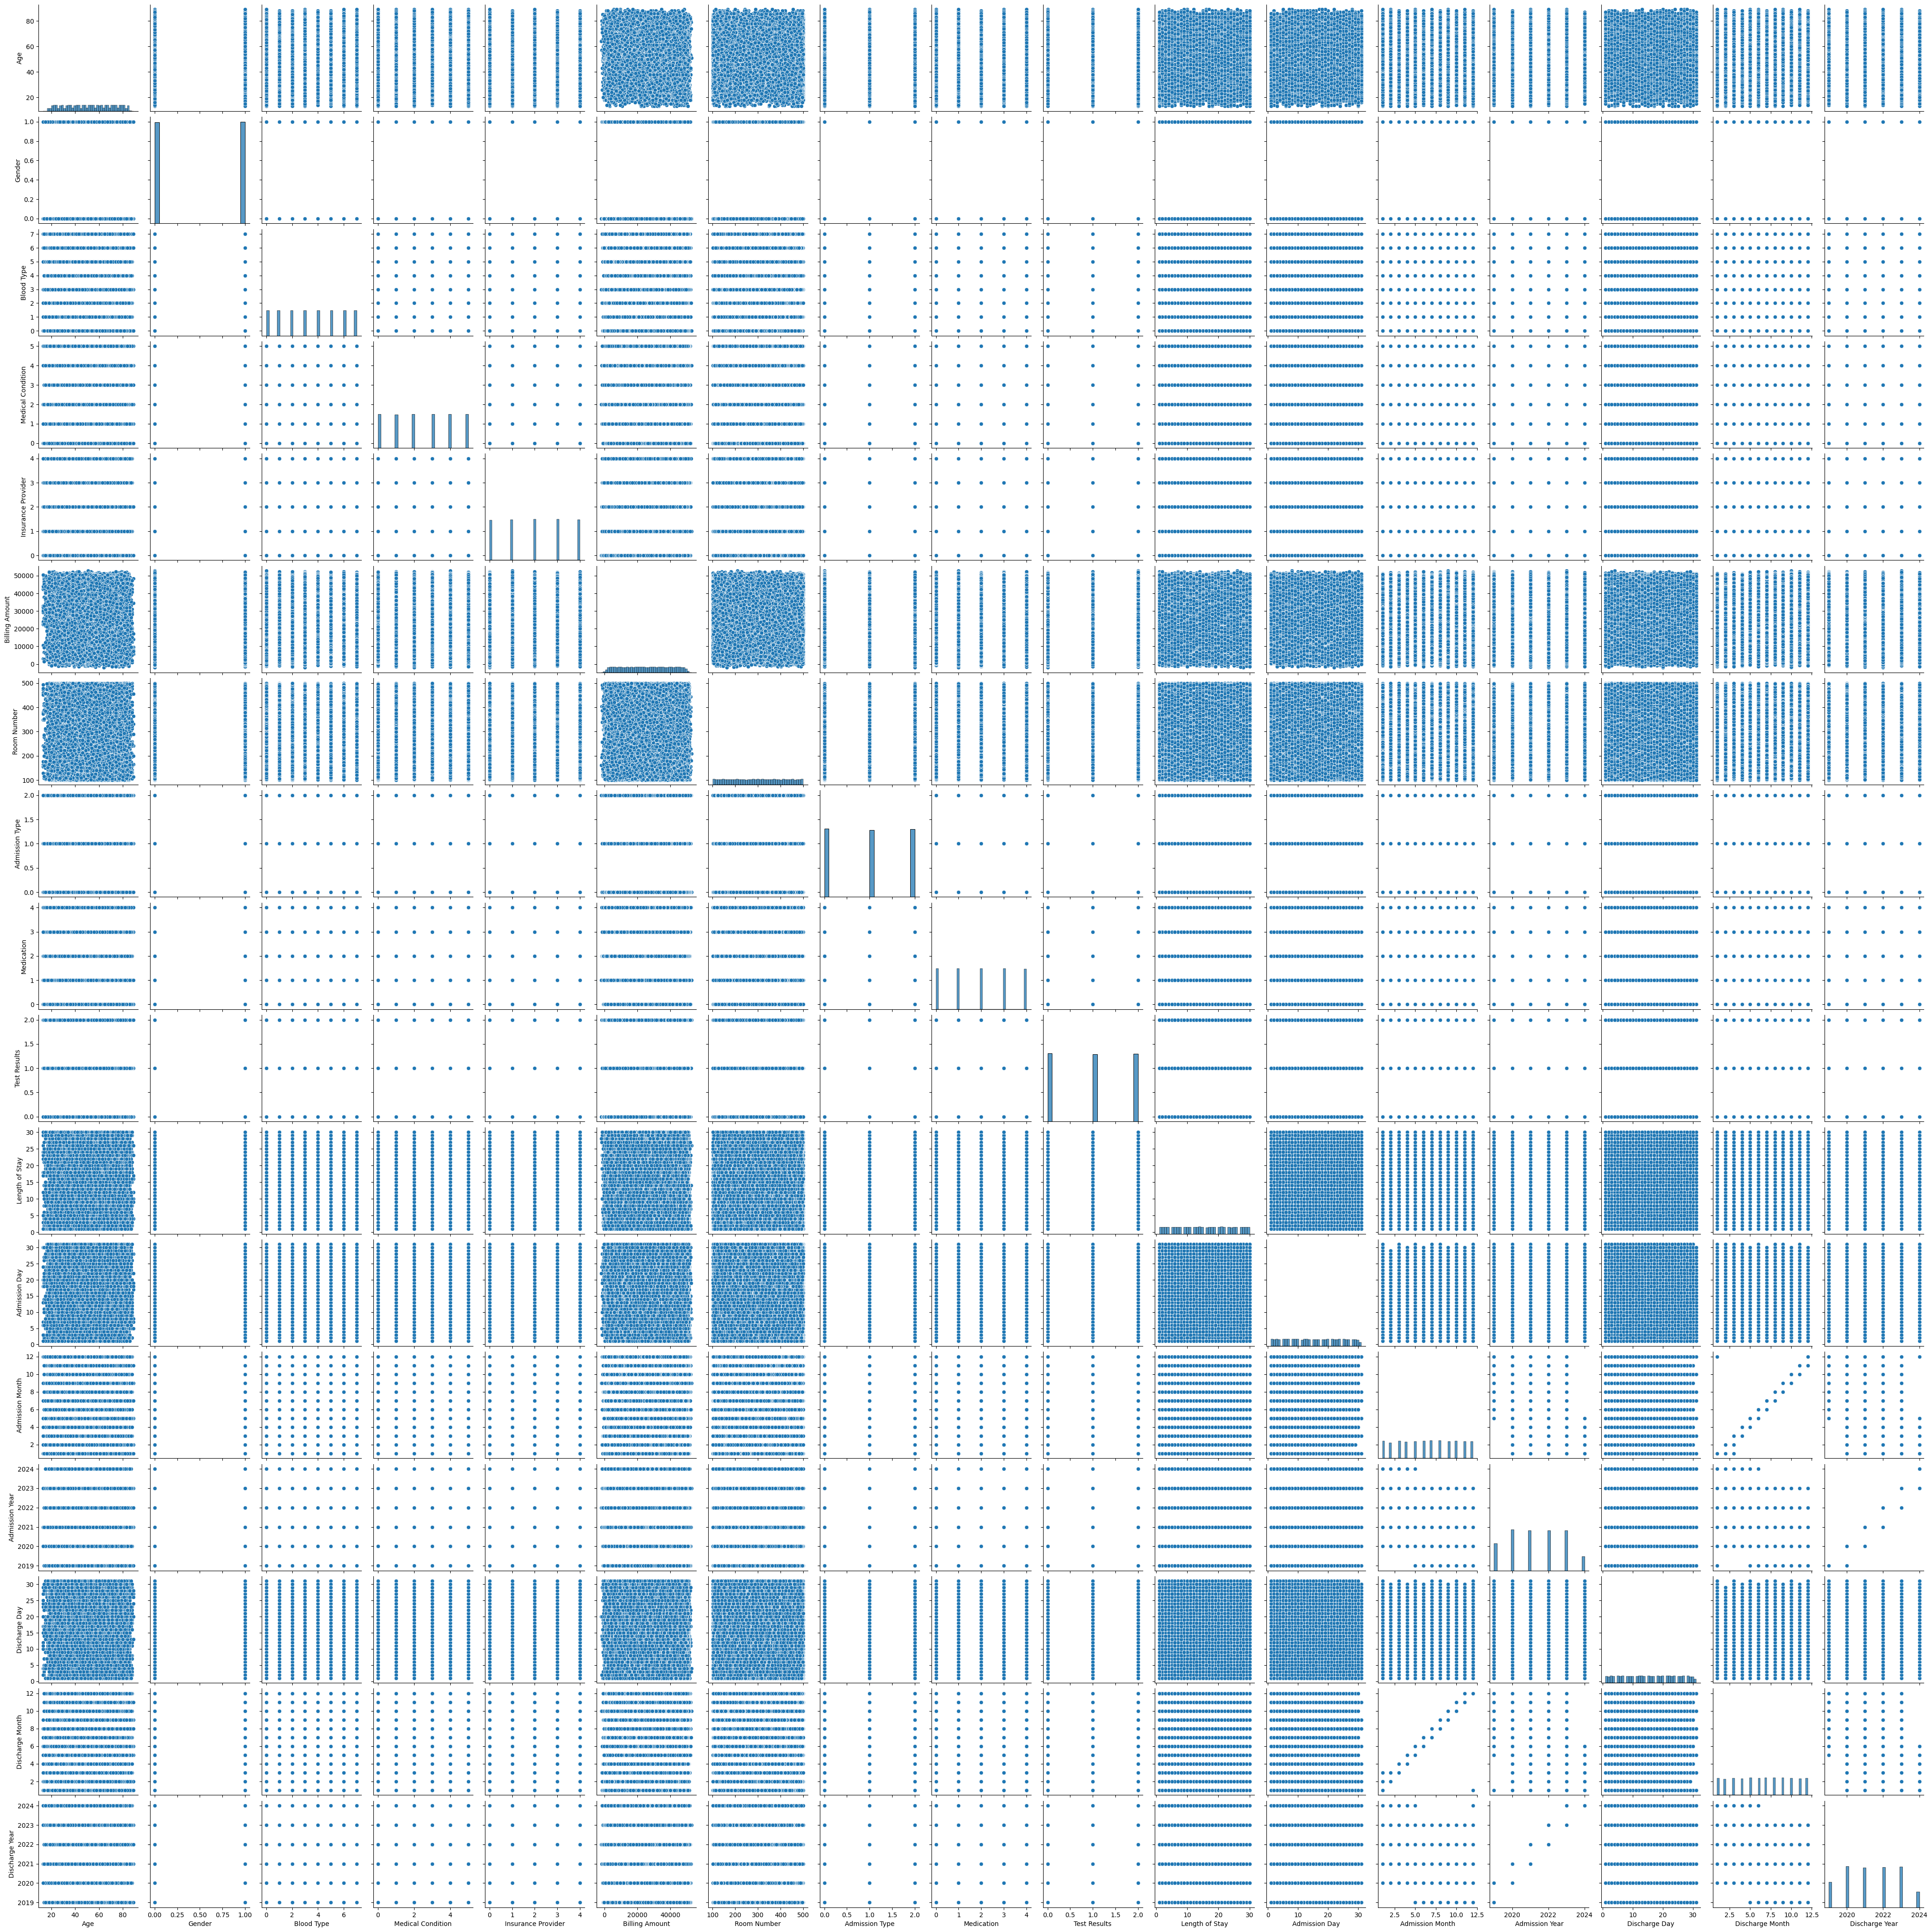

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(numeric_df)
plt.show()


In [30]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Length of Stay',
       'Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day',
       'Discharge Month', 'Discharge Year'],
      dtype='object')

# scatter 

# Cant use liner regression

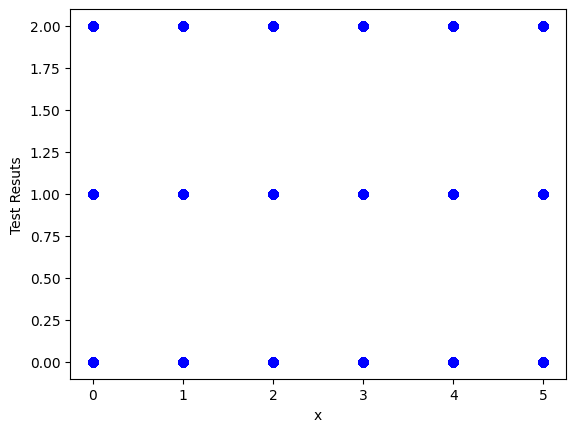

In [31]:
plt.scatter(data=df, x='Medical Condition', y='Test Results',  color='blue')
plt.xlabel("x")
plt.ylabel("Test Resuts")
plt.show()

In [32]:
df.head()

Name  Age  Gender  Blood Type  Medical Condition  \
0  Bobby JacksOn   30       1           5                  2   
1   LesLie TErRy   62       1           0                  5   
2    DaNnY sMitH   76       0           1                  5   
3   andrEw waTtS   28       0           6                  3   
4  adrIENNE bEll   43       0           2                  2   

             Doctor                    Hospital  Insurance Provider  \
0     Matthew Smith             Sons and Miller                   1   
1   Samantha Davies                     Kim Inc                   3   
2  Tiffany Mitchell                    Cook PLC                   0   
3       Kevin Wells  Hernandez Rogers and Vang,                   3   
4    Kathleen Hanna                 White-White                   0   

   Billing Amount  Room Number  Admission Type  Medication  Test Results  \
0    18856.281306          328               2           3             2   
1    33643.327287          265               1           1             1   
2    27955.096079          205               1           0             2   
3    37909.782410          450               0           1             0   
4    14238.317814          458               2           4             0   

   Length of Stay  Admission Day  Admission Month  Admission Year  \
0               2             31                1            2024   
1               6             20                8            2019   
2              15             22                9            2022   
3              30             18               11            2020   
4              20             19                9            2022   

   Discharge Day  Discharge Month  Discharge Year  
0              2                2            2024  
1             26                8            2019  
2              7               10            2022  
3             18               12            2020  
4              9               10            2022

## Train Test Splitting

In [33]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Admission Day','Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

# Logistic Regression

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


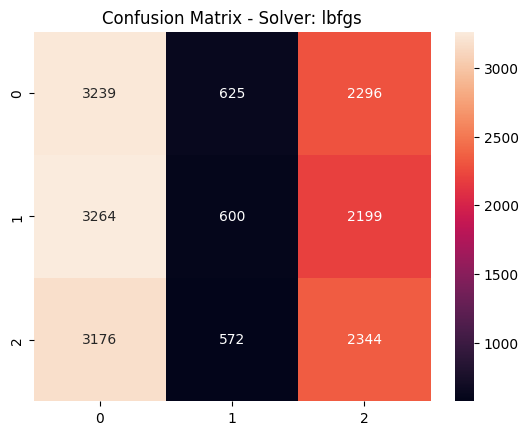

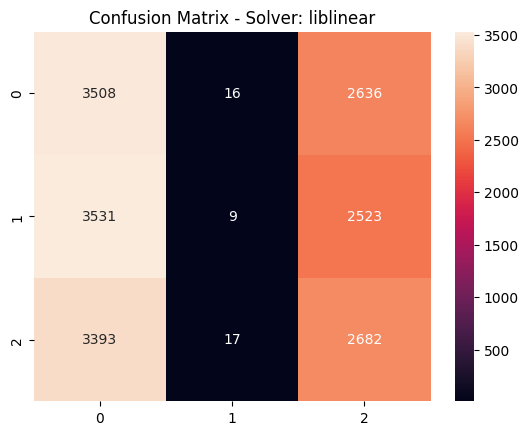

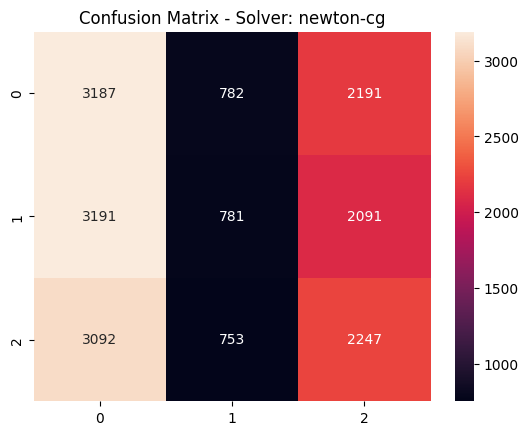

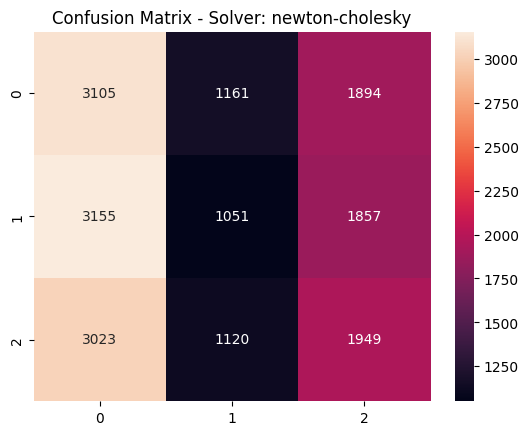

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


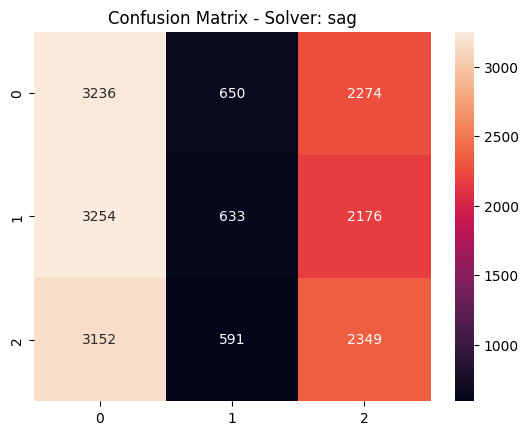

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


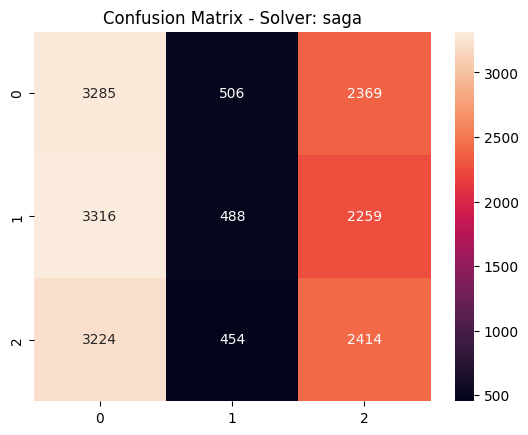

Solver: lbfgs
              precision    recall  f1-score   support

           0       0.33      0.53      0.41      6160
           1       0.33      0.10      0.15      6063
           2       0.34      0.38      0.36      6092

    accuracy                           0.34     18315
   macro avg       0.34      0.34      0.31     18315
weighted avg       0.34      0.34      0.31     18315

Solver: liblinear
              precision    recall  f1-score   support

           0       0.34      0.57      0.42      6160
           1       0.21      0.00      0.00      6063
           2       0.34      0.44      0.38      6092

    accuracy                           0.34     18315
   macro avg       0.30      0.34      0.27     18315
weighted avg       0.30      0.34      0.27     18315

Solver: newton-cg
              precision    recall  f1-score   support

           0       0.34      0.52      0.41      6160
           1       0.34      0.13      0.19      6063
           2       0.34  

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the solvers
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

# Set up a dictionary to store results
results = {}

for solver in solvers:
    LR_model = LogisticRegression(solver=solver)
    LR_model.fit(X_train, y_train)
    predictions = LR_model.predict(X_test)
    predictions_probability = LR_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    

    results[solver] = {
        "classification_report": classification_report(y_test, predictions),
        "confusion_matrix": cf_matrix
    }

    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    plt.title(f"Confusion Matrix - Solver: {solver}")
    plt.show()

# Print classification reports for each solver
for solver, result in results.items():
    print(f"Solver: {solver}")
    print(result["classification_report"])


# DecisionTreeClassifier

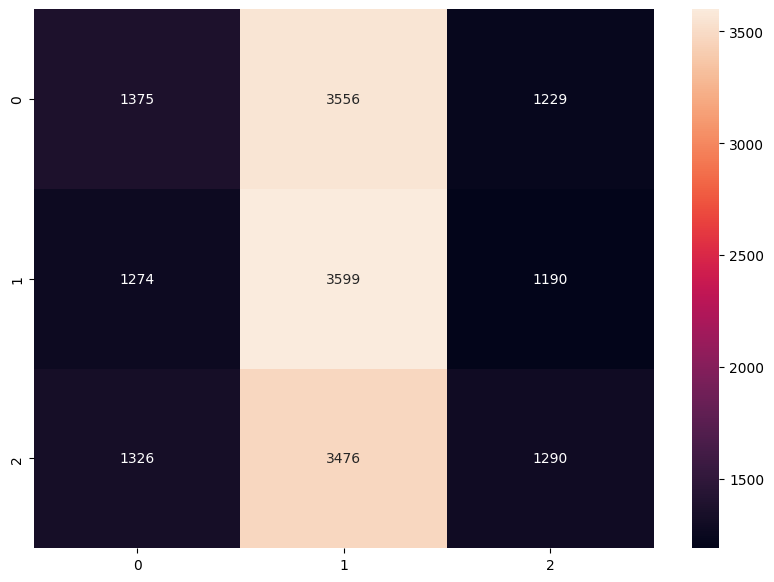

gini:
              precision    recall  f1-score   support

           0       0.35      0.22      0.27      6160
           1       0.34      0.59      0.43      6063
           2       0.35      0.21      0.26      6092

    accuracy                           0.34     18315
   macro avg       0.34      0.34      0.32     18315
weighted avg       0.34      0.34      0.32     18315



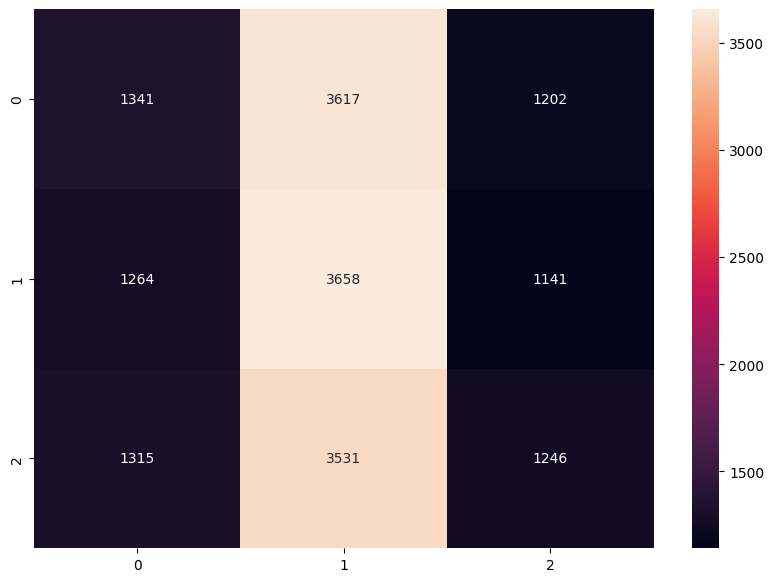

entropy:
              precision    recall  f1-score   support

           0       0.34      0.22      0.27      6160
           1       0.34      0.60      0.43      6063
           2       0.35      0.20      0.26      6092

    accuracy                           0.34     18315
   macro avg       0.34      0.34      0.32     18315
weighted avg       0.34      0.34      0.32     18315



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

solver_list = ['gini', 'entropy']

for solver in solver_list:
    tree_model = DecisionTreeClassifier(criterion=solver, max_depth=7)
    tree_model.fit(X_train, y_train)
    predictions = tree_model.predict(X_test)
    predictions_probabilty = tree_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cf_matrix, annot=True, fmt='.0f')
    plt.show()  # Show the heatmap
    
    csr = classification_report(y_test, predictions)
    print(f"{solver}:")
    print(csr)

# RandomForestClassifier

In [111]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Admission Day','Admission Month','Admission Year','Discharge Day','Discharge Month','Discharge Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)


In [112]:
from sklearn.ensemble import RandomForestClassifier
tree_model = RandomForestClassifier(criterion='gini',n_estimators=43,max_depth=None).fit(X_train,y_train) 
tree_model

RandomForestClassifier(n_estimators=43)

In [113]:
predictions = tree_model.predict(X_test)
print(predictions[1:10])
print(y_test[1:10])

[1 0 0 2 2 0 0 2 1]
[0 1 2 2 0 1 0 2 0]


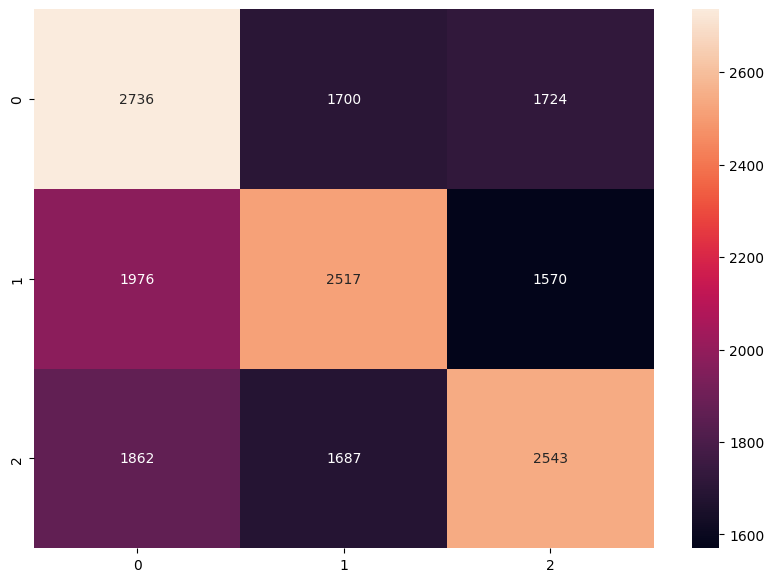

              precision    recall  f1-score   support

           0       0.42      0.44      0.43      6160
           1       0.43      0.42      0.42      6063
           2       0.44      0.42      0.43      6092

    accuracy                           0.43     18315
   macro avg       0.43      0.43      0.43     18315
weighted avg       0.43      0.43      0.43     18315



In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
criterion = 'gini'
tree_model = RandomForestClassifier(criterion=criterion,n_estimators=43,max_depth=None)
tree_model.fit(X_train,y_train)
predictions = tree_model.predict(X_test)
predictions_probabilty = tree_model.predict_proba(X_test)

cf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix,annot=True,fmt='.0f')
plt.show()

csr = classification_report(y_test,predictions)
print (csr)

# deep leranig NN

In [40]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Length of Stay',
       'Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day',
       'Discharge Month', 'Discharge Year'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Admission Day','Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()


In [55]:
ncols = X_train.shape[1]
ncols

7

In [56]:
model = Sequential()

In [69]:
from keras.models import Sequential
from keras.layers import Dense
 

model = Sequential()
model.add(Dense(128, input_shape=(ncols,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(units=1, activation="softmax"))  # Softmax activation for multi-class classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(0.02) #learning Rate = 0.01
model.compile(loss='mean_squared_error',optimizer=optimizer , metrics = ['mae'])

In [72]:
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose =True )
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/50


c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6711 - mae: 0.6711 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 2/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6700 - mae: 0.6700 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 3/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6712 - mae: 0.6712 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 4/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6677 - mae: 0.6677 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 5/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6668 - mae: 0.6668 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 6/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6721 - mae: 0.6721 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 7/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6712 - mae: 0.6712 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 8/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6672 - mae: 0.6672 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 9/50
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6684 

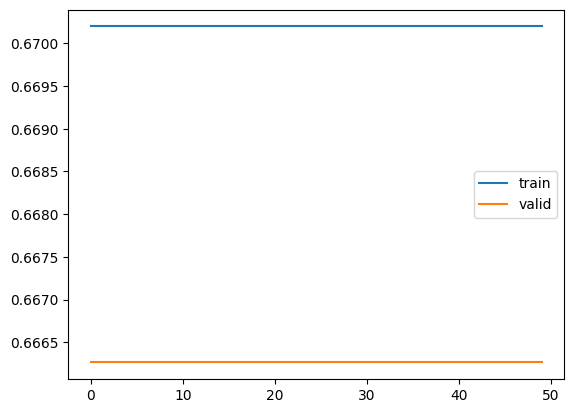

In [73]:
import matplotlib.pyplot as plt

plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)

114/573 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


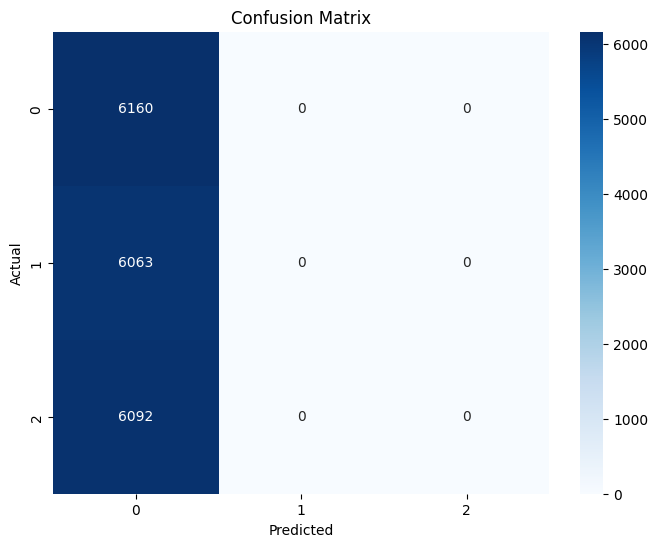

Classification Report:

              precision    recall  f1-score   support

           0       0.34      1.00      0.50      6160
           1       0.00      0.00      0.00      6063
           2       0.00      0.00      0.00      6092

    accuracy                           0.34     18315
   macro avg       0.11      0.33      0.17     18315
weighted avg       0.11      0.34      0.17     18315

AUC: 0.50


c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

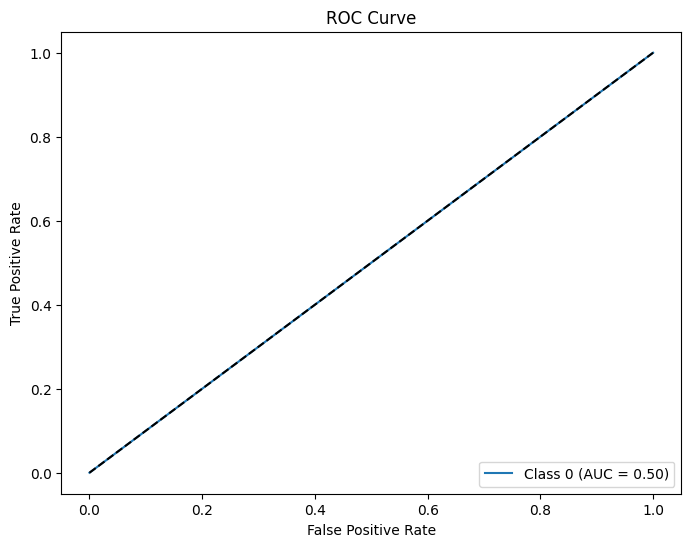

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Get predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Assuming y_test contains class labels like [0, 1, 2] for a multi-class problem
num_classes = y_pred_prob.shape[1]

# Binarize y_test for multi-class ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Calculate AUC using 'ovr' for multi-class classification
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'AUC: {auc:.2f}')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(num_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])

plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# SVM

In [76]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Length of Stay',
       'Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day',
       'Discharge Month', 'Discharge Year'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Discharge Year','Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

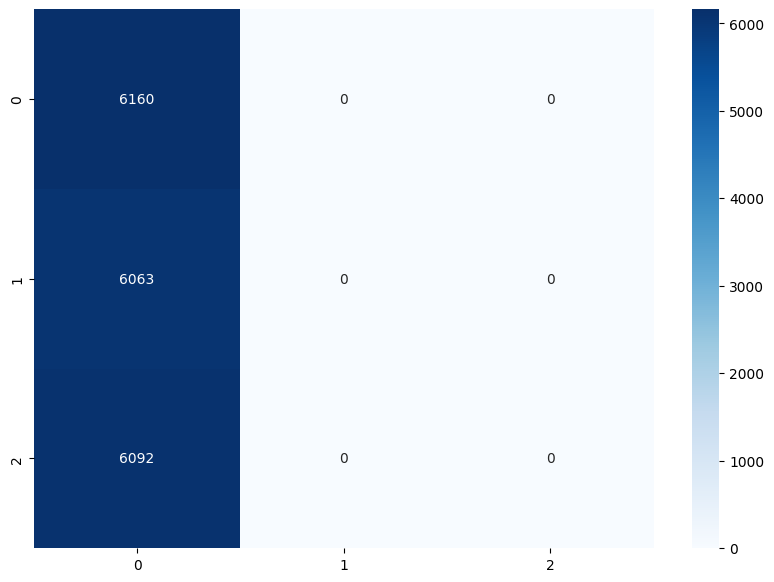

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.50      6160
           1       0.00      0.00      0.00      6063
           2       0.00      0.00      0.00      6092

    accuracy                           0.34     18315
   macro avg       0.11      0.33      0.17     18315
weighted avg       0.11      0.34      0.17     18315



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [78]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = SVC(probability=True)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
predictions_probability = model.predict_proba(X_test)

# Compute confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt=".0f", cmap='Blues')
plt.show()

# Print classification report
csr = classification_report(y_test, predictions)
print(f"Classification Report:\n{csr}")


# GradientBoostingRegressor

In [83]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Length of Stay',
       'Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day',
       'Discharge Month', 'Discharge Year'],
      dtype='object')

In [88]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Discharge Year','Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

Accuracy: 0.34321594321594323
Confusion Matrix:
 [[2339 1713 2108]
 [2300 1747 2016]
 [2227 1665 2200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.38      0.36      6160
           1       0.34      0.29      0.31      6063
           2       0.35      0.36      0.35      6092

    accuracy                           0.34     18315
   macro avg       0.34      0.34      0.34     18315
weighted avg       0.34      0.34      0.34     18315

AUC: 0.51


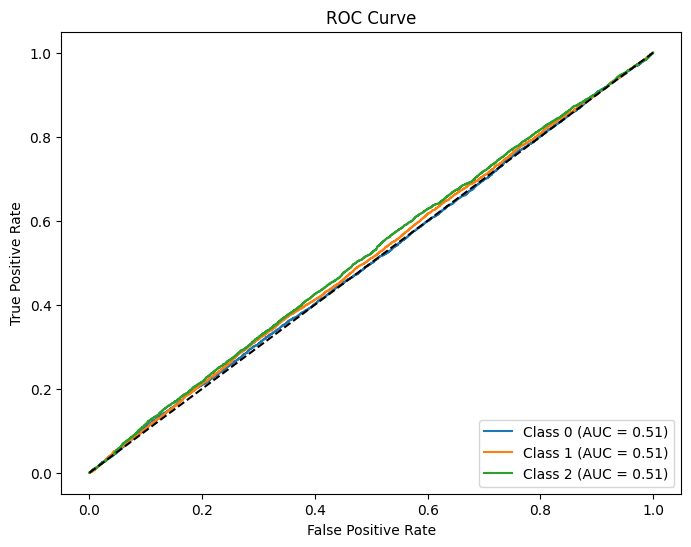

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_rep)

# Assuming y_test contains class labels like [0, 1, 2] for a multi-class problem
num_classes = y_pred_prob.shape[1]

# Binarize y_test for multi-class ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Calculate AUC using 'ovr' for multi-class classification
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'AUC: {auc:.2f}')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(num_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])

plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# PAC

In [90]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Discharge Year','Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

In [91]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# بناء النموذج
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(3, activation='softmax'))

# تجميع النموذج
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

# التنبؤ بالمجموعة الاختبارية
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# تقييم الأداء
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')


Epoch 1/20


c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3719/3719 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3332 - loss: 50.4795
Epoch 2/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.3322 - loss: 2.0225
Epoch 3/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3373 - loss: 1.9615
Epoch 4/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3347 - loss: 1.9909
Epoch 5/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3316 - loss: 2.0714
Epoch 6/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3319 - loss: 2.0959
Epoch 7/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3302 - loss: 2.0553
Epoch 8/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3374 - loss: 1.9864
Epoch 9/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3345 - loss: 2.0610
Epoch 10/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3315 - loss: 2.0012
Epoch 11/20
3719/3719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3309 - loss: 2.0435
Epoch 12/20
3719/3719 ━━━━━━━━━━━━━━━━

#  Try last

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = df[['Medical Condition','Length of Stay','Admission Type','Age','Discharge Year','Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:

pca = PCA(n_components=0.80)  
X_pca = pca.fit_transform(X_scaled)

# عرض عدد المكونات الجديدة
print(f'Number of components: {pca.n_components_}')


Number of components: 5


In [109]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# التنبؤ بالمجموعة الاختبارية
y_pred = model.predict(X_test)

# تقييم الأداء
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.41


Accuracy: 0.34316134316134317
Confusion Matrix:
 [[2339 1713 2108]
 [2300 1747 2016]
 [2227 1666 2199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.38      0.36      6160
           1       0.34      0.29      0.31      6063
           2       0.35      0.36      0.35      6092

    accuracy                           0.34     18315
   macro avg       0.34      0.34      0.34     18315
weighted avg       0.34      0.34      0.34     18315

AUC: 0.51


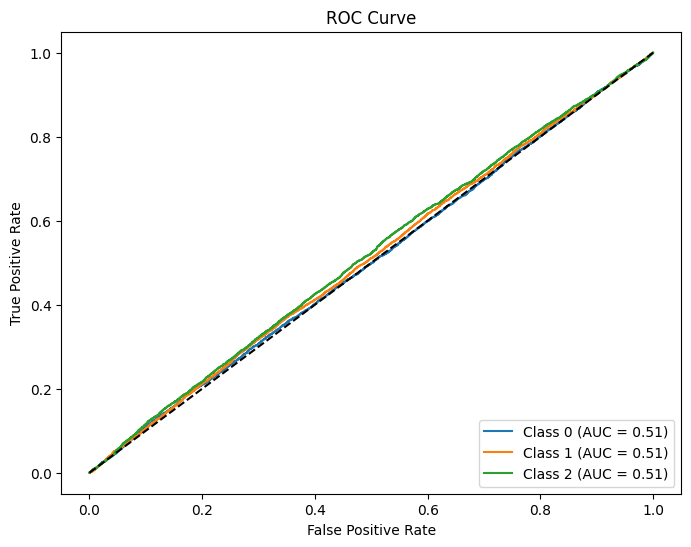

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_rep)

num_classes = y_pred_prob.shape[1]

y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'AUC: {auc:.2f}')

fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(num_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])

plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
